In [20]:
import pandas as pd
import warnings
import seaborn as sns
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer 
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
df1= pd.read_csv('/Users/osazuwa/Downloads/bank-full.csv')
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [22]:
df1.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [23]:
df1.dtypes # chwecking datat types 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [24]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [25]:
df1.shape


(45211, 17)

In [26]:

df1.info() #checking data information and not just data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [27]:
df1.isnull().sum() # checking for any null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [28]:
df1.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [29]:
df1.drop('pdays',axis=1, inplace=True)

# dropping pdays column
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,0,unknown,no


In [30]:
df1.drop('month',axis=1, inplace=True)

# dropping pdays column
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,198,1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,139,1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,217,1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,380,1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,50,1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,55,1,0,unknown,no


In [33]:
# using one-hot encoding for all the object columns
df2= pd.get_dummies(df1, prefix='poutcome', columns=['poutcome']) #This function does One-Hot-Encoding on categorical text
df3=pd.get_dummies(df2, prefix='New', columns=['job','marital','education','default','housing','loan','contact'])
df4=pd.get_dummies(df3, prefix='Target', columns=['Target'])
df4

,age,balance,day,duration,campaign,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,...,New_yes,New_no,New_yes,New_no,New_yes,New_cellular,New_telephone,New_unknown,Target_no,Target_yes
0,58,2143,5,261,1,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0
1,44,29,5,151,1,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0
2,33,2,5,76,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
3,47,1506,5,92,1,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0
4,33,1,5,198,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
45207,71,1729,17,456,2,0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
45208,72,5715,17,1127,5,3,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
45209,57,668,17,508,4,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0


In [34]:
#rechecking data types
df4.dtypes

age                  int64
balance              int64
day                  int64
duration             int64
campaign             int64
previous             int64
poutcome_failure     uint8
poutcome_other       uint8
poutcome_success     uint8
poutcome_unknown     uint8
New_admin.           uint8
New_blue-collar      uint8
New_entrepreneur     uint8
New_housemaid        uint8
New_management       uint8
New_retired          uint8
New_self-employed    uint8
New_services         uint8
New_student          uint8
New_technician       uint8
New_unemployed       uint8
New_unknown          uint8
New_divorced         uint8
New_married          uint8
New_single           uint8
New_primary          uint8
New_secondary        uint8
New_tertiary         uint8
New_unknown          uint8
New_no               uint8
New_yes              uint8
New_no               uint8
New_yes              uint8
New_no               uint8
New_yes              uint8
New_cellular         uint8
New_telephone        uint8
N

In [ ]:
sns.pairplot(df1, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

<AxesSubplot:>

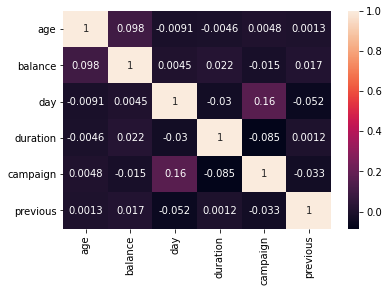

In [18]:
sns.heatmap(df1.corr(), annot=True)  # plot the correlation coefficients as a heatmap NO HIGH CORRELATION BETWEEN THE VARIABLES

<AxesSubplot:>

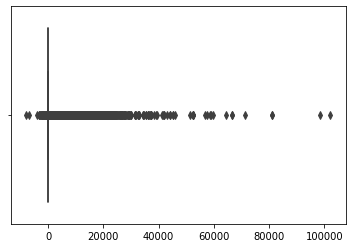

In [39]:

sns.boxplot(df4)

<AxesSubplot:>

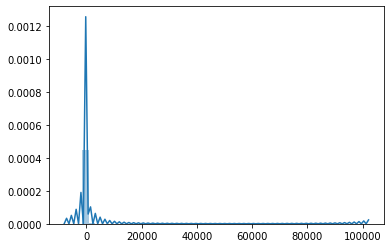

In [62]:
sns.distplot(df4) # seeing the skewness of the data

<AxesSubplot:xlabel='poutcome_success', ylabel='campaign'>

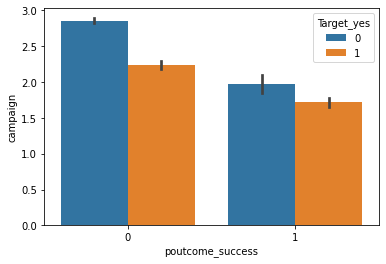

In [51]:
sns.barplot(df4['poutcome_success'],df4['campaign'], hue=df4['Target_yes']) # BIvariate comparisons

<AxesSubplot:xlabel='poutcome_success', ylabel='duration'>

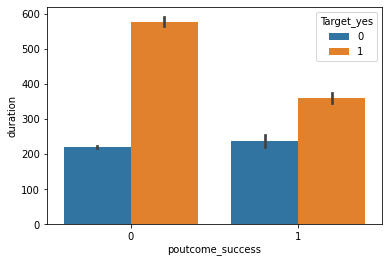

In [96]:
sns.barplot(df4['poutcome_success'],df4['duration'], hue=df4['Target_yes']) # BIvariate comparisons

<AxesSubplot:xlabel='poutcome_success', ylabel='campaign'>

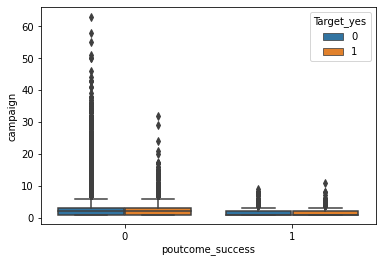

In [63]:
sns.boxplot(df4['poutcome_success'],df4['campaign'], hue=df4['Target_yes']) # adta has several outliers especially wih the target 0 values

<AxesSubplot:xlabel='poutcome_success', ylabel='count'>

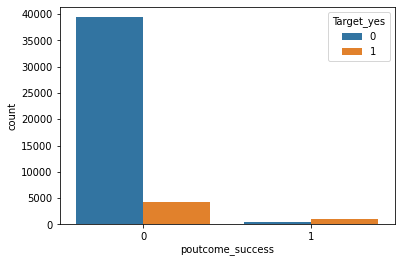

In [67]:
sns.countplot(df4['poutcome_success'], hue=df4['Target_yes'])# a high number of people did not get a target for the successful outcome. The aim will be to ensure the people who have a high porbability for success will be targeted.

In [82]:
# Using "StandardScaler" function for normalization of the age data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df['Age_Norm_Sklearn'] = MinMaxScaler().fit_transform(df[['age']])
df4

,balance,day,duration,campaign,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,New_admin.,...,New_no,New_yes,New_no,New_yes,New_cellular,New_telephone,New_unknown,Target_no,Target_yes,Age_Norm_Sklearn
0,2143,5,261,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,1,0,0.519481
1,29,5,151,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,1,0,0.337662
2,2,5,76,1,0,0,0,0,1,0,...,0,1,0,1,0,0,1,1,0,0.194805
3,1506,5,92,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,1,0,0.376623
4,1,5,198,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0.194805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,17,977,3,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0.428571
45207,1729,17,456,2,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0.688312
45208,5715,17,1127,5,3,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0.701299
45209,668,17,508,4,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0.506494


In [88]:
df4.drop('Target_no', axis=1,inplace=True) #dropping the Target_no column as the data is already captured in the target_yes which ie most important to the company

In [182]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

features = [col for col in df4.columns if col != 'Target_yes']

X_train, X_test, y_train, y_test = train_test_split(df4[features], df4['Target_yes'], test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((31647, 56), (13564, 56))

In [91]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=22)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=22, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [97]:
#  confusion matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8920592789205928

Testing accuracy 0.8897817752875258

Confusion Matrix


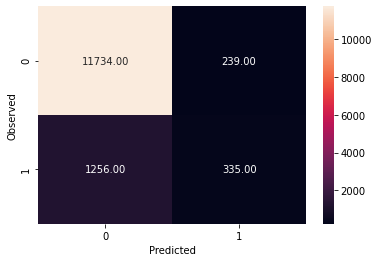

None

Recall: 0.21055939660590822

Precision: 0.5836236933797909

F1 Score: 0.30946882217090066

Roc Auc Score: 0.5952989081918709


In [98]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [99]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.901, 0.892, 0.901, 0.88, 0.879]

[0.899, 0.89, 0.899, 0.88, 0.879]


In [100]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.901, 0.879]

[0.899, 0.879]


In [ ]:
#Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'

In [103]:
model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg')

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.901033273296047

Testing accuracy 0.898997345915659


Trainig accuracy 0.901033273296047

Testing accuracy 0.898997345915659

Confusion Matrix


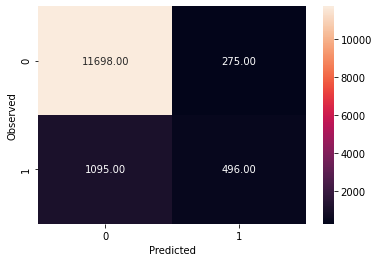

None

Recall: 0.3117536140791955

Precision: 0.6433203631647212

F1 Score: 0.41998306519898393

Roc Auc Score: 0.64439263431764


In [104]:
# TESTING ACCURACY IMPROVED WITH l2 and newton-cg
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg',C=0.75) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

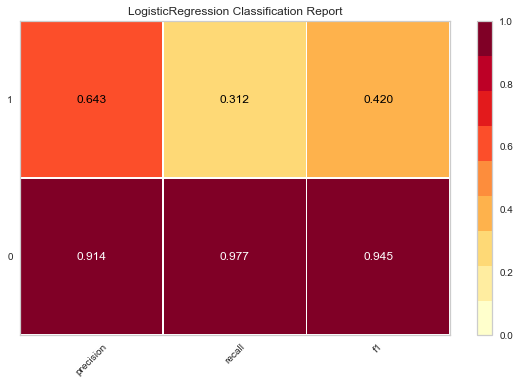

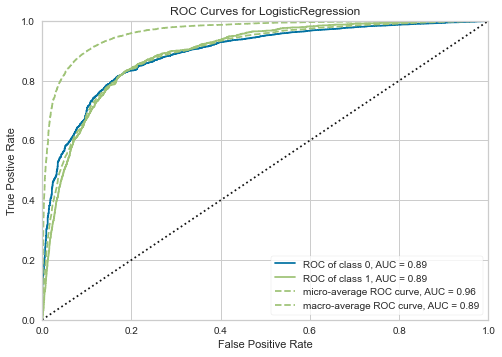

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [105]:

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [106]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. 

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [107]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.86


In [ ]:
#The data is slightly overfit fitted, hence the 86% performance on the test data

In [109]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4) # applying pruning to a max depth of 4 we obtain better performance on the test and train data.
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.90
Test: 0.90


In [115]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 340 kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=262c3cffc640c6d750345d8618bc29988993cf1bfc663665f25e87697e3989cb
  Stored in directory: /Users/osazuwa/Library/Caches/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [141]:
!pip install graphviz

In [206]:
from sklearn.tree import export_graphviz
from io import StringIO    
from IPython.display import Image  
import pydotplus
import graphviz



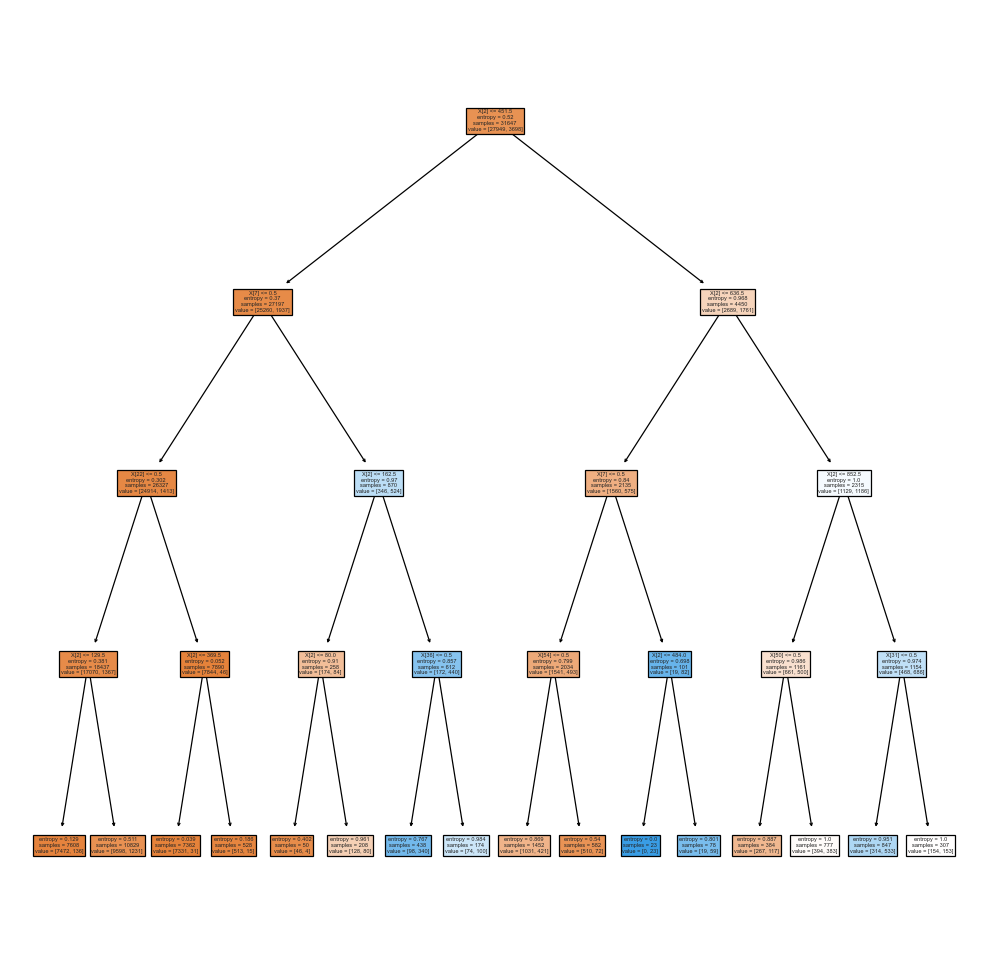

In [205]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf_pruned,
           filled = True);

fig.savefig('imagename.png') #VISUALIZING DECISION TREE NOT USING GRAPHVIZ DUE TO ISSUES WITH GRAPHVIZ RUNNING

[Text(223.2, 269.082, 'X[2] <= 451.5\nentropy = 0.52\nsamples = 31647\nvalue = [27949, 3698]'),
 Text(111.6, 209.286, 'X[7] <= 0.5\nentropy = 0.37\nsamples = 27197\nvalue = [25260, 1937]'),
 Text(55.8, 149.49, 'X[22] <= 0.5\nentropy = 0.302\nsamples = 26327\nvalue = [24914, 1413]'),
 Text(27.9, 89.69399999999999, 'X[2] <= 129.5\nentropy = 0.381\nsamples = 18437\nvalue = [17070, 1367]'),
 Text(13.95, 29.897999999999968, 'entropy = 0.129\nsamples = 7608\nvalue = [7472, 136]'),
 Text(41.849999999999994, 29.897999999999968, 'entropy = 0.511\nsamples = 10829\nvalue = [9598, 1231]'),
 Text(83.69999999999999, 89.69399999999999, 'X[2] <= 369.5\nentropy = 0.052\nsamples = 7890\nvalue = [7844, 46]'),
 Text(69.75, 29.897999999999968, 'entropy = 0.039\nsamples = 7362\nvalue = [7331, 31]'),
 Text(97.64999999999999, 29.897999999999968, 'entropy = 0.186\nsamples = 528\nvalue = [513, 15]'),
 Text(167.39999999999998, 149.49, 'X[2] <= 162.5\nentropy = 0.97\nsamples = 870\nvalue = [346, 524]'),
 Text(139

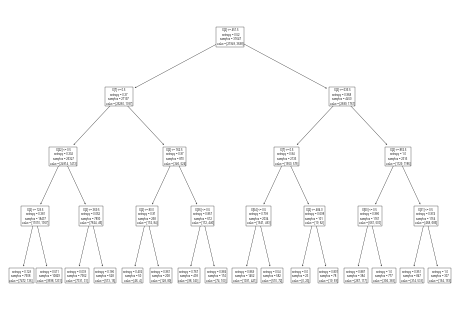

In [151]:
from sklearn import tree
tree.plot_tree(clf_pruned)

In [162]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

In [163]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11755,218
1,1148,443


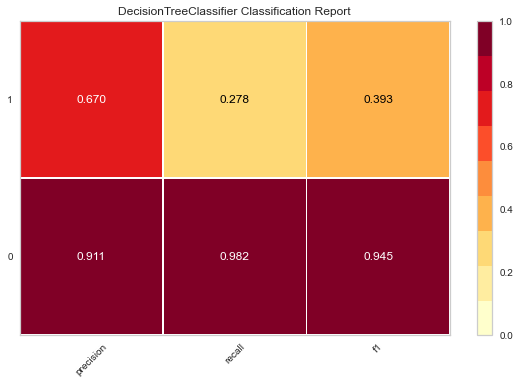

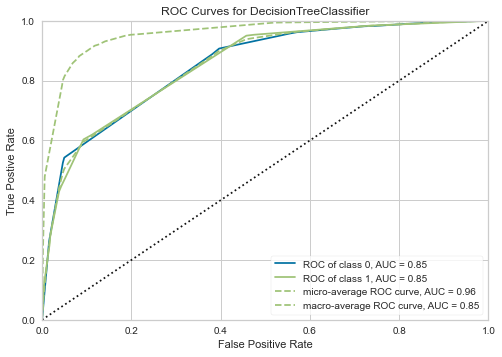

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [165]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [166]:
# Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.596997
poutcome_success,0.279098
New_married,0.102616
New_unknown,0.003484
balance,0.000000
New_primary,0.000000
New_unemployed,0.000000
New_divorced,0.000000
New_single,0.000000
New_tertiary,0.000000


In [ ]:
# From the above the most important feature is the duration of last contact, the outcome of the previous marketing campaign and the Married status

In [167]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.899292


In [168]:
# APPLYING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [169]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [170]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.899292
0,Random Forest,0.897891


In [171]:
# APPLYING ADABOOST
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [172]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [173]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.899292
0,Random Forest,0.897891
0,Adaboost,0.895385


In [174]:
#APPLYING BAGGING
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [175]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [176]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.899292
0,Random Forest,0.897891
0,Adaboost,0.895385
0,Bagging,0.898555


In [177]:
#APPLYING GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [178]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [179]:
#display in a DF the accuracy of the various models and concat result for gradient boosting with that of all the previous models
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.899292
0,Random Forest,0.897891
0,Adaboost,0.895385
0,Bagging,0.898555
0,Gradient Boost,0.901504


In [ ]:
# GRADIENT BOOSTING has the best accuracy which is very similar to the decision tree because of the 90.1% accuracy as compared to other models

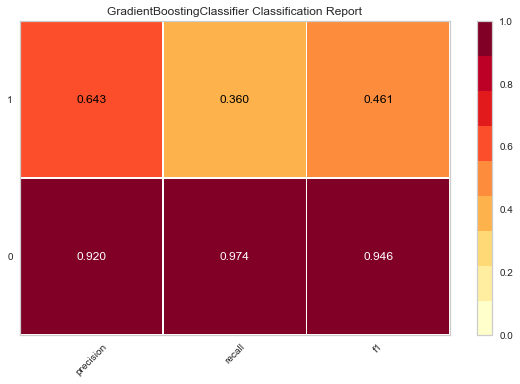

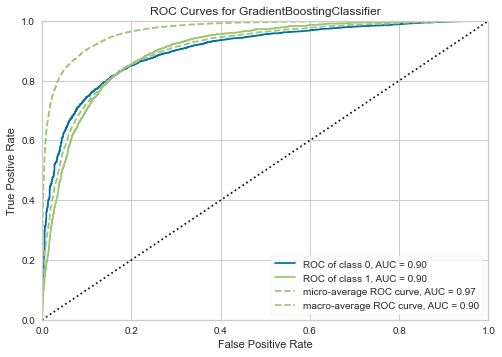

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [180]:
# Visualize Selected model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()